# Описание данных

**Таблица books**
*Содержит данные о книгах:*

`book_id` — идентификатор книги;

`author_id` — идентификатор автора;

`title` — название книги;

`num_pages` — количество страниц;

`publication_date` — дата публикации книги;

`publisher_id` — идентификатор издателя.




**Таблица authors**
*Содержит данные об авторах:*

`author_id` — идентификатор автора;

`author` — имя автора.


**Таблица publishers**
*Содержит данные об издательствах:*

`publisher_id` — идентификатор издательства;

`publisher` — название издательства;


**Таблица ratings**
*Содержит данные о пользовательских оценках книг:*

`rating_id` — идентификатор оценки;

`book_id` — идентификатор книги;

`username` — имя пользователя, оставившего оценку;

`rating` — оценка книги.


**Таблица reviews**
*Содержит данные о пользовательских обзорах на книги:*

`review_id` — идентификатор обзора;

`book_id` — идентификатор книги;

`username` — имя пользователя, написавшего обзор;

`text` — текст обзора

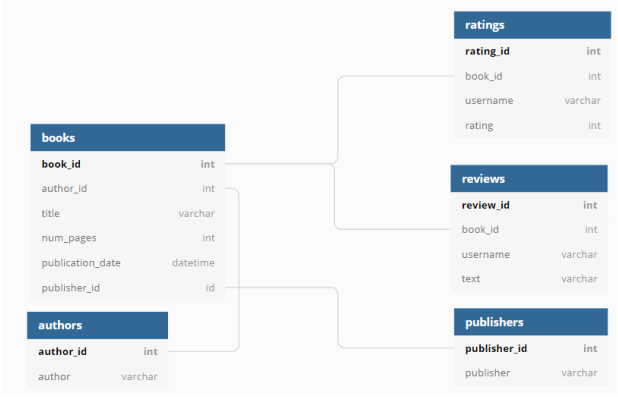

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student',
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})
#pd.io.sql.read_sql(query, con = engine) - для выполнения SQL запроса

# Выполнение запросов SQL

In [3]:
for table in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = ''' SELECT * FROM {}; 
    '''.format(table) 

    request = pd.io.sql.read_sql(query, con = engine)
    print(f'Таблица - "{table}"')
    print(request.info())
    display(request.head())   
    

Таблица - "books"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Таблица - "authors"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Таблица - "publishers"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Таблица - "ratings"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
None


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Таблица - "reviews"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## Посчитайте, сколько книг вышло после 1 января 2000 года;

In [4]:
query_one = '''

SELECT COUNT(book_id) AS count_book
FROM books
WHERE publication_date >= '2000-01-01';'''

pd.io.sql.read_sql(query_one, con = engine)

,count_book
0,821


- **После 1 января 2000 года вышло 821 книг.**

## Для каждой книги посчитайте количество обзоров и среднюю оценку;

In [5]:
query_two = '''
SELECT b.title AS title,
       COUNT(DISTINCT re.text) AS count_review,
       AVG(r.rating) AS avg_rating
FROM books AS b
FULL JOIN reviews AS re ON re.book_id = b.book_id
FULL JOIN ratings AS r ON r.book_id = b.book_id
GROUP BY title, b.book_id
ORDER BY count_review DESC
LIMIT 5;'''

pd.io.sql.read_sql(query_two, con = engine)

,title,count_review,avg_rating
0,Twilight (Twilight #1),7,3.662500
1,Outlander (Outlander #1),6,4.125000
2,Eat Pray Love,6,3.395833
3,Harry Potter and the Chamber of Secrets (Harry...,6,4.287500
4,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634


- **Первое место занимает первая часть Twilight с 7 обзорами, дальше идет большое количество книг с 6 обзорами**

In [6]:
query_dop = '''
SELECT title,
       COUNT(title) AS counter 
FROM books 
GROUP BY title 
HAVING (COUNT(title)>1);'''

pd.io.sql.read_sql(query_dop, con = engine)

,title,counter
0,Memoirs of a Geisha,2


## Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [7]:
query_tree = '''
SELECT p.publisher AS publisher,
       COUNT(b.title) AS count_book
FROM publishers AS p
JOIN books AS b ON b.publisher_id = p.publisher_id
WHERE num_pages >= 50
GROUP BY publisher
ORDER BY count_book DESC
LIMIT 5 ;'''
pd.io.sql.read_sql(query_tree, con = engine)

,publisher,count_book
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


- **Penguin Books выпустил 42 книг, дальше идут Vintage -31, Grand Central Publishing - 25, Penguin Classics - 24**

## Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [8]:
query4 = ''' 
SELECT query.author,
       ROUND(AVG(query.avg_rating),2) AS avg_rate
FROM
        (SELECT a.author AS author,
                AVG(r.rating) AS avg_rating,
                COUNT(r.rating_id) AS count_rating
        FROM books AS b
        LEFT JOIN authors AS a ON b.author_id = a.author_id
        LEFT JOIN ratings AS r ON b.book_id = r.book_id
        GROUP BY b.book_id, a.author_id
        HAVING COUNT(r.rating_id) >=50 
        ) AS query
GROUP BY    
    query.author
ORDER BY
    avg_rate DESC
LIMIT 5; ''' 

request4 = pd.io.sql.read_sql(query4, con = engine)
request4

,author,avg_rate
0,J.K. Rowling/Mary GrandPré,4.28
1,Markus Zusak/Cao Xuân Việt Khương,4.26
2,J.R.R. Tolkien,4.26
3,Louisa May Alcott,4.19
4,Rick Riordan,4.08


- **J.K. Rowling/Mary GrandPré имеют наивысшую среднюю оценку - 2.28 , следом идут РMarkus Zusak/Cao Xuân Việt Khương с чуть низким баллом - 4.26**

## Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [9]:
query_five = ''' 

SELECT
    ROUND(AVG(request.сount_reviews),2)
FROM
    (SELECT username,
            COUNT(review_id) AS сount_reviews
    FROM reviews
    WHERE username IN (
                SELECT username
                FROM ratings
                GROUP BY username
                HAVING COUNT(rating_id) > 50)
GROUP BY username) AS request; ''' 

pd.io.sql.read_sql(query_five, con = engine)

,round
0,24.33


- **Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24**

# Вывод

**Проанализировав БД и совершим запросы в `SQL` мы можем сделать следующие выводы:**

- В БД была замечена книга, встречающаяся 2 раза - `Memoirs of a Geisha`


- После 1 января 2000 года вышло `821` книг.


- Первое место занимает первая часть `Twilight` с 7 обзорами, дальше идет большое количество книг с 6 обзорами


- `Penguin Books` выпустил `42` книг, дальше идут `Vintage` -`31`, `Grand Central Publishing` - `25`, `Penguin Classics` - `24`


- Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24.33


- `J.K. Rowling/Mary GrandPré` имеют наивысшую среднюю оценку - `2.28` , следом идут `РMarkus Zusak/Cao Xuân Việt Khương` с баллом - `4.26`